<a href="https://colab.research.google.com/github/Whoami666/Free-Practice/blob/main/Neuros_convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

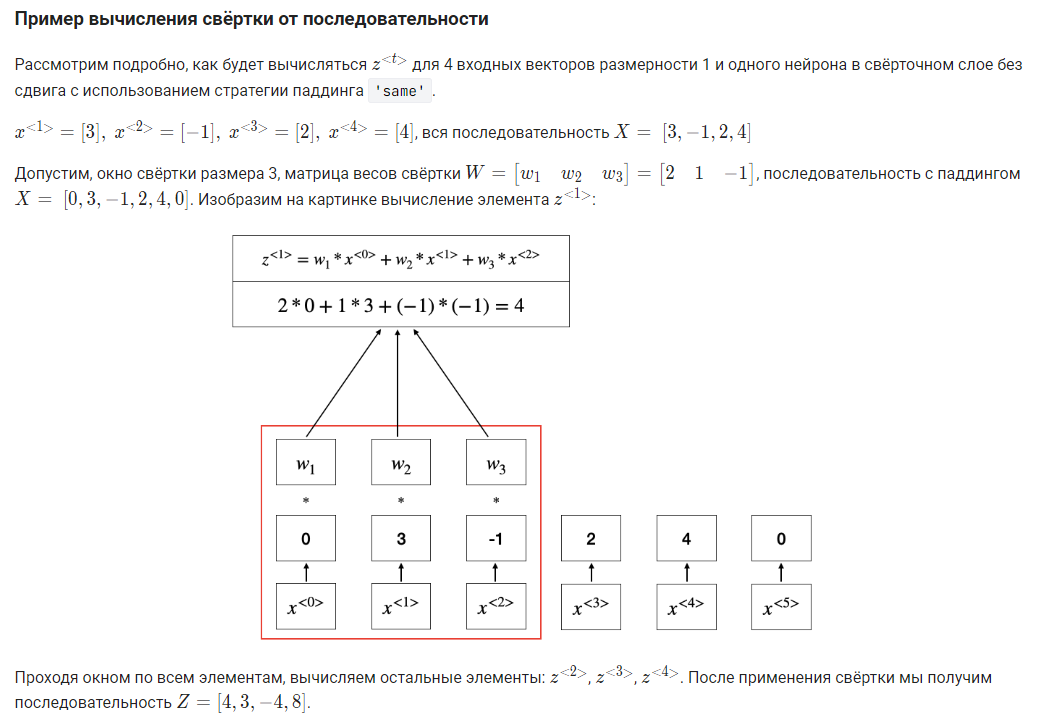

In [ ]:
import numpy as np

In [ ]:
X = np.array([3, -1, 2, 4])
W = np.array([2, 1, -1])
window_x = 3
window_y = 1

In [ ]:
def padding(x):
    return np.concatenate(([0], x, [0]), axis=0)

def conv(x):
  z = np.zeros(len(x))
  for i in range(len(x) - window_x + 1):
    for j in range(len(x) - window_y + 1):
        z[i] = x[i:i+window_x]@W
  print(z[:(len(x)-2)])

conv(padding(X))

[ 4.  3. -4.  8.]


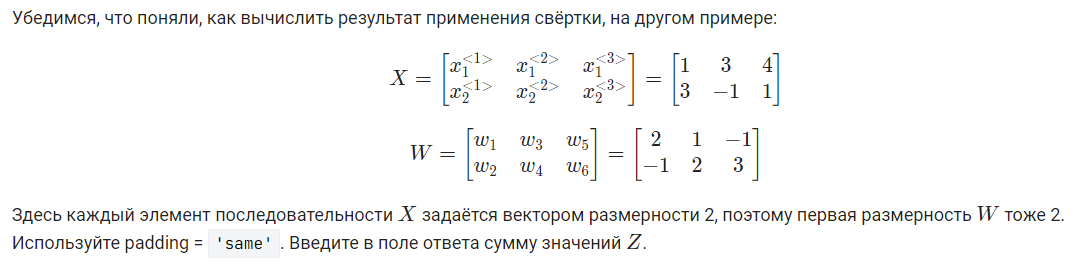

In [ ]:
X = np.array([[0, 0, 0, 0, 0],[0, 1, 3, 4, 0],[0, 3, -1, 1, 0],[0, 0, 0, 0, 0]])
W = np.array([[2, 1, -1],[-1, 2, 3]])
window_x = 3
window_y = 2

In [ ]:
def conv(x):
  summa = 0
  for i in range(len(x[0]) - window_x + 1):
     for j in range(len(x) - window_y + 1):
      print(x[i:i+window_x, j:j+window_y])
      print((x[i:i+window_x, j:j+window_y]@W).sum(), '\n')
      summa += (x[i:i+window_x, j:j+window_y]@W).sum()
  print(summa)

conv(X)

[[0 0]
 [0 1]
 [0 3]]
16 

[[ 0  0]
 [ 1  3]
 [ 3 -1]]
16 

[[ 0  0]
 [ 3  4]
 [-1  1]]
24 

[[0 1]
 [0 3]
 [0 0]]
16 

[[ 1  3]
 [ 3 -1]
 [ 0  0]]
16 

[[ 3  4]
 [-1  1]
 [ 0  0]]
24 

[[0 3]
 [0 0]]
12 

[[ 3 -1]
 [ 0  0]]
2 

[[-1  1]
 [ 0  0]]
2 

128


In [ ]:
def padding(x):
    for row in x:
      row = np.concatenate(([0], x, [0]), axis=0)
    
    return x

def conv(x):
  z = np.zeros(len(x))
  for i in range(len(x) - window_x + 1):
    for j in range(len(x) - window_y + 1):
        z[i] = x[i:i+window_x]@W
  print(z[:(len(x)-2)])

conv(padding(X))

**Используем Торч для сверток**

In [ ]:
import torch
import torch.nn as nn

in_channels = 1
out_channels = 1
kernel_size = 2
conv =  nn.Conv1d(4, 3, 3, stride=1) #nn.Conv2d(in_channels, out_channels, kernel_size)

input = torch.from_numpy(X)

In [ ]:
print("Input Tensor:", input)
print("Input Size:",input.size())

output = conv(input)
print("Output Tensor:", output)

Input Tensor: tensor([[ 0,  0,  0,  0,  0],
        [ 0,  1,  3,  4,  0],
        [ 0,  3, -1,  1,  0],
        [ 0,  0,  0,  0,  0]])
Input Size: torch.Size([4, 5])


RuntimeError: ignored

**Размер Свертки**

In [ ]:
def conv_size(W1, H1, P, S, F):
  W2 = (W1 - F + 2*P) / S + 1
  H2 = (H1 - F + 2*P) / S + 1
  return (W2, H2)

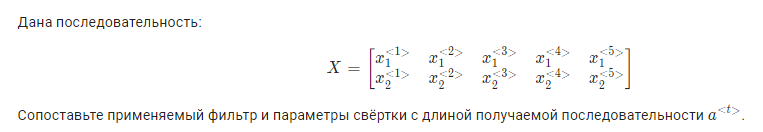

In [ ]:
width = 5
height = 2

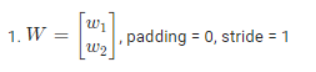

In [ ]:
conv_size(width, height, P = 0, S = 1, F = 1)

(5.0, 2.0)

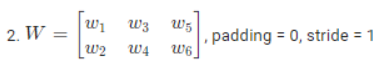

In [ ]:
conv_size(width, height, P = 0, S = 1, F = 3)

(3.0, 0.0)

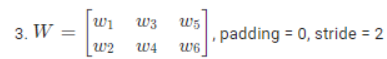

In [ ]:
conv_size(width, height, P = 0, S = 2, F = 3)

(2.0, 0.5)

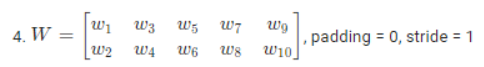

In [ ]:
conv_size(width, height, P = 0, S = 1, F = 5)

(1.0, -2.0)

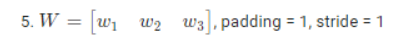

In [ ]:
#тут нельзя получить ответ, тк окно неверное

In [ ]:
a = np.array([[-0.0001804 , -0.0007725, 0 ],
       [-0.00021236,  0.00059826, 0]])


In [ ]:
a = a.reshape(3, 2)
a

array([[-0.0001804 , -0.0007725 ],
       [ 0.        , -0.00021236],
       [ 0.00059826,  0.        ]])